In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris

In [3]:
dataset = load_iris()

In [24]:
X = dataset['data']
y = dataset['target_names'][dataset['target']]
feature_names = dataset['feature_names']

<Axes: ylabel='count'>

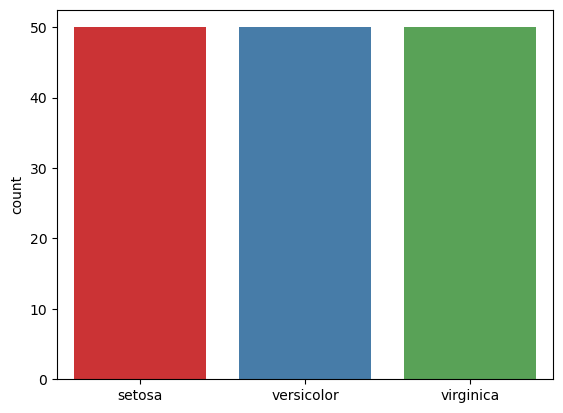

In [5]:
sns.countplot(x=y, hue=y, palette='Set1')

In [6]:
from sklearn.preprocessing import StandardScaler

In [14]:
def pca(X, M):
    """
        Params:
        1) X: (N, D) numpy array
        2) M: integer
        Returns:
        1) X_transformed: (N, M) numpy array
        2) principal_components: (D, M) numpy array
        3) explained_variance: (D) numpy array
    """
    X_scaled = StandardScaler().fit_transform(X)
    covariance_matrix = np.cov(X_scaled.T)
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    explained_variance = (eigenvalues * 100) / eigenvalues.sum()
    principal_components = eigenvectors[:, :M]
    X_transformed = np.dot(X_scaled, principal_components)
    return X_transformed, principal_components, explained_variance

In [10]:
X_transformed, principal_components, explained_variance = pca(X, 2)

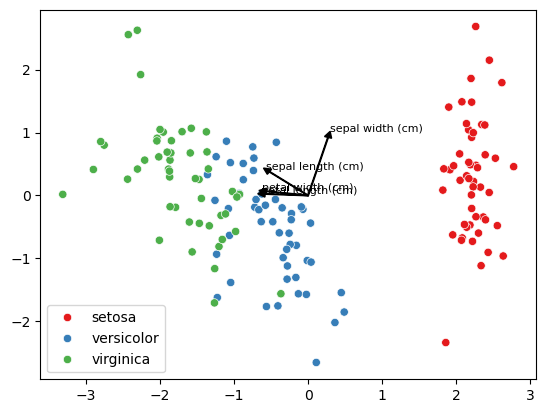

In [49]:
sns.scatterplot(x=X_transformed[:, 0], y=X_transformed[:, 1], hue=y, palette='Set1')
for i in range(principal_components.shape[0]):
    plt.arrow(0, 0, principal_components[i, 0], principal_components[i, 1], width=.01, head_width=.1, head_length=.1, color='black')
    plt.text(principal_components[i, 0] * 1.1, principal_components[i, 1] * 1.1, feature_names[i], fontdict={ 'size': 8 })